In [10]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.8.20 torch-2.4.1 CPU (Apple M2 Max)
Setup complete ✅ (12 CPUs, 32.0 GB RAM, 407.9/926.4 GB disk)


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('../yolov8.yaml')  # build a new model from scratch

# Display model information (optional)
model.info()

# Train the model on the widerface dataset for 50 epochs
widerface_yaml_path = "widerface.yaml"
results = model.train(data=widerface_yaml_path,
                      batch=32,
                      epochs=50, 
                      imgsz=192,
                      device="mps",
                      optimizer="adam")

# 單張圖片預測

In [0]:
# Run inference with the YOLOv8n model 
test_image_path = "../datasets/YOLO_format_widerface/test/videos/t_n017_converted.avi"
model = YOLO("runs/detect/best.pt")
pred_results = model.predict(source=str(test_image_path),save=False,conf=0.3)
for result in pred_results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk

# 預測影片結果(含FPS)

In [2]:
import cv2
import time
from ultralytics import YOLO

# Load the YOLO model
# model = YOLO("best_model/result/416/best_416.pt")
# model = YOLO("best_model/result/512/best_512.pt")
model = YOLO("best_model/result/640/best_640.pt")

# Open the video file
# FHD
FHD_video_path_1 = "../datasets/YOLO_format_widerface/test/videos/FHD/Angry_1920_1080.mp4"
FHD_video_path_2 = "../datasets/YOLO_format_widerface/test/videos/FHD/cctv_ppl_1920_1080.mp4"
FHD_video_path_3 = "../datasets/YOLO_format_widerface/test/videos/FHD/crowded_1920_1080_30fps.mp4"
FHD_video_path_4 = "../datasets/YOLO_format_widerface/test/videos/FHD/europe_street_1920_1080_30fps.mp4"
FHD_video_path_5 = "../datasets/YOLO_format_widerface/test/videos/FHD/jwalking_1920_1080.mp4"
FHD_video_path_6 = "../datasets/YOLO_format_widerface/test/videos/FHD/night_india_1920_1080_30fps.mp4"
FHD_video_path_7 = "../datasets/YOLO_format_widerface/test/videos/FHD/ppl_walking_1920_1080.mp4"

# HD
HD_video_path_1 = "../datasets/YOLO_format_widerface/test/videos/HD/Angry_1280_720.mp4"
HD_video_path_2 = "../datasets/YOLO_format_widerface/test/videos/HD/cctv_ppl_1280_720.mp4"
HD_video_path_3 = "../datasets/YOLO_format_widerface/test/videos/HD/china_citywalk_1280_720.mp4"
HD_video_path_4 = "../datasets/YOLO_format_widerface/test/videos/HD/crowded_1280_720.mp4"
HD_video_path_5 = "../datasets/YOLO_format_widerface/test/videos/HD/europe_street_1280_720.mp4"
HD_video_path_6 = "../datasets/YOLO_format_widerface/test/videos/HD/pedestrians_1280_720.mp4"

cap = cv2.VideoCapture(FHD_video_path_1)

# Get the original resolution of the video
video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_fps = cap.get(cv2.CAP_PROP_FPS)  # Retrieve the original FPS of the video

# Initialize variables for FPS calculation
fps = 0.0
frame_count = 0
total_inference_time = 0

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = model(frame,conf=0.3)
        infer_speed_per_frame = f"{results[0].speed['inference']:.2f}"
        infer_speed_per_frame = float(infer_speed_per_frame) * 10**-3
        # Calculate FPS
        total_inference_time += infer_speed_per_frame
        fps = 1 / infer_speed_per_frame
        frame_count += 1

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Overlay FPS on the frame
        cv2.putText(annotated_frame, f"FPS: {fps:.2f}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

# Calculate metrics
average_inference_time = total_inference_time / frame_count
avg_fps = 1 / average_inference_time
print("==================================================================================")
print(f"Original Video Resolution: {video_width} x {video_height}")
print(f"Original Video FPS: {video_fps:.2f}")
print("****** Evaluation Metrics *****")
print(f"Average inference time: {average_inference_time:.3f}s")
print(f"Average fps: {avg_fps:.2f}")

# Save metrics to a file
output_file = "../datasets/YOLO_format_widerface/test/videos/FHD/FHD_results/inference_metrics.txt"
with open(output_file, "a") as f:  # Open in append mode
    f.write(f"Video: {FHD_video_path_1}\n")
    f.write(f"Resolution: {video_width}x{video_height}, Original FPS: {video_fps:.2f}\n")
    f.write(f"Average Inference Time: {average_inference_time:.3f}s\n")
    f.write(f"Average FPS: {avg_fps:.2f}\n")
    f.write("=" * 50 + "\n")  # Add a separator for readability

print(f"Metrics saved to {output_file}")

0: 384x640 (no detections), 78.4ms
Speed: 6.5ms preprocess, 78.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 lisences, 53.3ms
Speed: 8.0ms preprocess, 53.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 83.5ms
Speed: 1.5ms preprocess, 83.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 63.6ms
Speed: 1.9ms preprocess, 63.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 lisence, 146.1ms
Speed: 15.2ms preprocess, 146.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 88.4ms
Speed: 1.3ms preprocess, 88.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 61.4ms
Speed: 1.7ms preprocess, 61.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


2024-12-01 12:44:17.716 python[2377:2146316] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-01 12:44:17.716 python[2377:2146316] +[IMKInputSession subclass]: chose IMKInputSession_Modern


0: 384x640 1 lisence, 93.4ms
Speed: 1.5ms preprocess, 93.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 57.8ms
Speed: 1.4ms preprocess, 57.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 lisence, 57.1ms
Speed: 1.4ms preprocess, 57.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 63.3ms
Speed: 1.7ms preprocess, 63.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 lisence, 53.8ms
Speed: 1.3ms preprocess, 53.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 61.8ms
Speed: 14.8ms preprocess, 61.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 (no detections), 54.3ms
Speed: 1.5ms preprocess, 54.3ms inference, 0.3ms postproce

# 群組照片並套用高斯模糊

0: 384x512 1 face, 32.6ms
Speed: 1.0ms preprocess, 32.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 512)
output_path: results/model_512/512/16_Award_Ceremony_Awards_Ceremony_16_454.jpg
Processed image saved to: results/model_512/512/16_Award_Ceremony_Awards_Ceremony_16_454.jpg


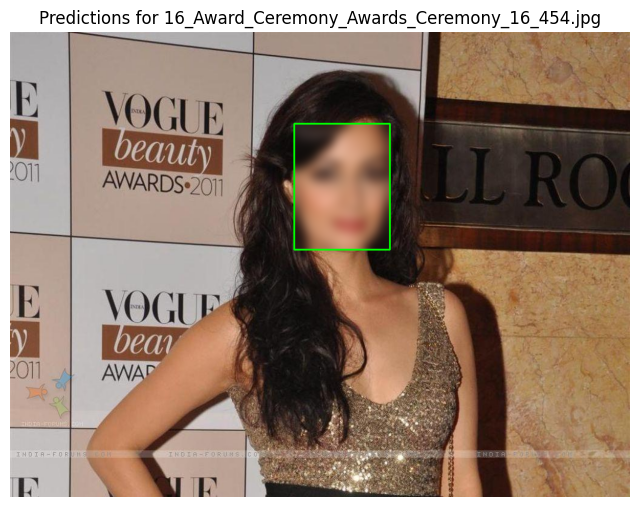

0: 352x512 2 faces, 40.3ms
Speed: 1.6ms preprocess, 40.3ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 512)
output_path: results/model_512/512/13_Interview_Interview_On_Location_13_566.jpg
Processed image saved to: results/model_512/512/13_Interview_Interview_On_Location_13_566.jpg


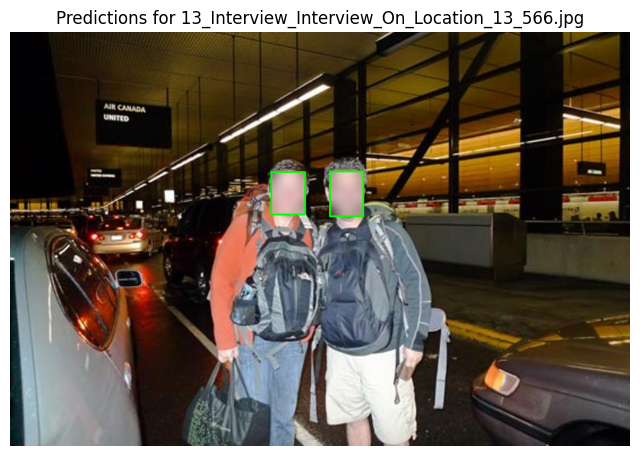

0: 224x512 5 faces, 21.1ms
Speed: 0.8ms preprocess, 21.1ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 512)
output_path: results/model_512/512/57_Angler_peoplefishing_57_314.jpg
Processed image saved to: results/model_512/512/57_Angler_peoplefishing_57_314.jpg


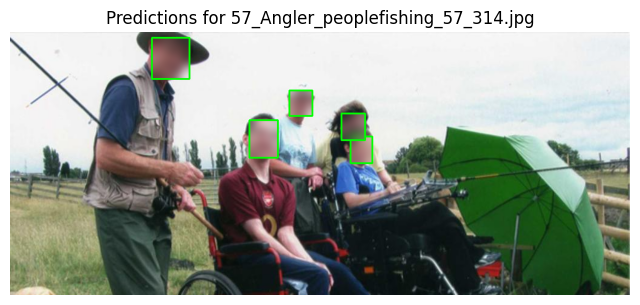

0: 384x512 8 faces, 28.8ms
Speed: 1.0ms preprocess, 28.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 512)
output_path: results/model_512/512/55_Sports_Coach_Trainer_sportcoaching_55_353.jpg
Processed image saved to: results/model_512/512/55_Sports_Coach_Trainer_sportcoaching_55_353.jpg


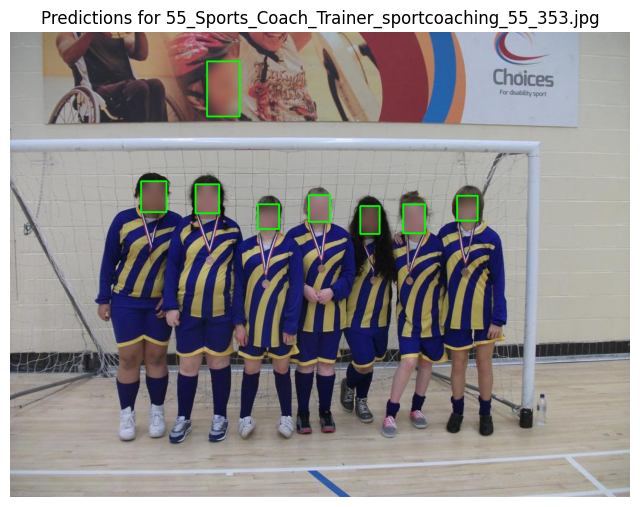

0: 384x512 8 faces, 28.6ms
Speed: 0.9ms preprocess, 28.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 512)
output_path: results/model_512/512/56_Voter_peoplevoting_56_342.jpg
Processed image saved to: results/model_512/512/56_Voter_peoplevoting_56_342.jpg


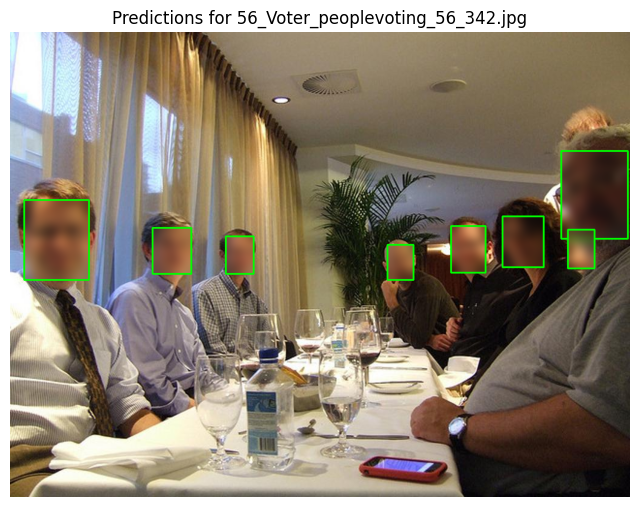

0: 384x512 108 faces, 35.8ms
Speed: 0.9ms preprocess, 35.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 512)
output_path: results/model_512/512/0_Parade_marchingband_1_196.jpg
Processed image saved to: results/model_512/512/0_Parade_marchingband_1_196.jpg


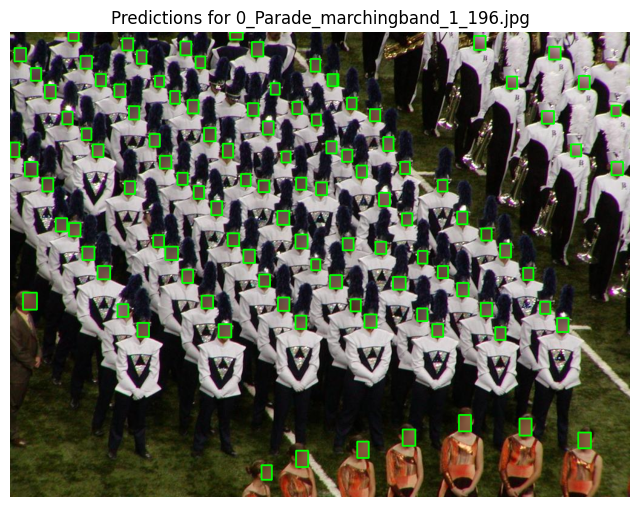

In [7]:
%matplotlib inline
import random
from ultralytics import YOLO
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# 加载模型
# model = YOLO("runs/detect/best.pt") # chris
model = YOLO("best_model/best_640_35.pt") # hay

# 设置训练集路径
# train_images_dir = Path("../datasets/YOLO_format_widerface/test/images")  # 替换为实际的训练图像文件夹路径

# 随机选择 10 张图像
# all_images = list(train_images_dir.glob("*.jpg"))  # 假设图像是 JPG 格式，若为 PNG，请改为 "*.png"
# random_images = random.sample(all_images, 1)
test_set_images = [
    '../datasets/YOLO_format_widerface/test/images/16_Award_Ceremony_Awards_Ceremony_16_454.jpg',
    '../datasets/YOLO_format_widerface/test/images/13_Interview_Interview_On_Location_13_566.jpg',
    '../datasets/YOLO_format_widerface/test/images/57_Angler_peoplefishing_57_314.jpg',
    '../datasets/YOLO_format_widerface/test/images/55_Sports_Coach_Trainer_sportcoaching_55_353.jpg',
    '../datasets/YOLO_format_widerface/test/images/56_Voter_peoplevoting_56_342.jpg',
    '../datasets/YOLO_format_widerface/test/images/0_Parade_marchingband_1_196.jpg'
]
# output path
output_256_dir_192 = Path("./results/model_256/192")
output_256_dir_256 = Path("./results/model_256/256")
output_256_dir_512 = Path("./results/model_256/512")
# 512
output_512_dir_192 = Path("./results/model_512/192")
output_512_dir_256 = Path("./results/model_512/256")
output_512_dir_512 = Path("./results/model_512/512")

# input image size
input_img_size = 512
cnf = 0.25

# 对每张图像进行推理并显示
for img_path in test_set_images:
    # Read the image
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    # 使用模型进行推理
    results = model.predict(source=img, save=False, imgsz=input_img_size,conf=cnf)
    

    # 获取推理后的图像，添加检测框
    result_img = results[0].plot()  # YOLOv8 API 中可直接使用 plot() 获取带标注的图像
    boxes = results[0].boxes
    # Apply Gaussian blur to each detected region
    for box in boxes:
        # Extract the bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Ensure coordinates are within image bounds
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, img.shape[1]), min(y2, img.shape[0])

        # Extract the region of interest (ROI)
        roi = img[y1:y2, x1:x2]

        # Apply Gaussian blur to the ROI
        blurred_roi = cv2.GaussianBlur(roi, (51, 51), 0)

        # Place the blurred ROI back into the original image
        img[y1:y2, x1:x2] = blurred_roi

        # 繪製邊框
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 顯示置信度
        label = f"{box.conf[0]:.2f}"
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        label_y = y1 - 10 if y1 - 10 > 10 else y1 + 10
        cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    output_path = output_512_dir_512 / Path(img_path).name
    print(f"output_path: {output_path}")
    cv2.imwrite(str(output_path), img)
    print(f"Processed image saved to: {output_path}")
    # Convert BGR image to RGB for displaying with Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 使用 Matplotlib 显示图像
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Predictions for {Path(img_path).name}")
    plt.show()

# Evaluation of 6 images of various size

1. 16_Award_Ceremony_Awards_Ceremony_16_454.jpg
2. 13_Interview_Interview_On_Location_13_566.jpg
3. 57_Angler_peoplefishing_57_314.jpg
4. 55_Sports_Coach_Trainer_sportcoaching_55_353.jpg
5. 56_Voter_peoplevoting_56_342.jpg
6. 12_Group_Large_Group_12_Group_Large_Group_12_80.jpg
7. 0_Parade_marchingband_1_196.jpg

# Single image prediction


0: 480x640 7 faces, 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
The FPS is : 27.14


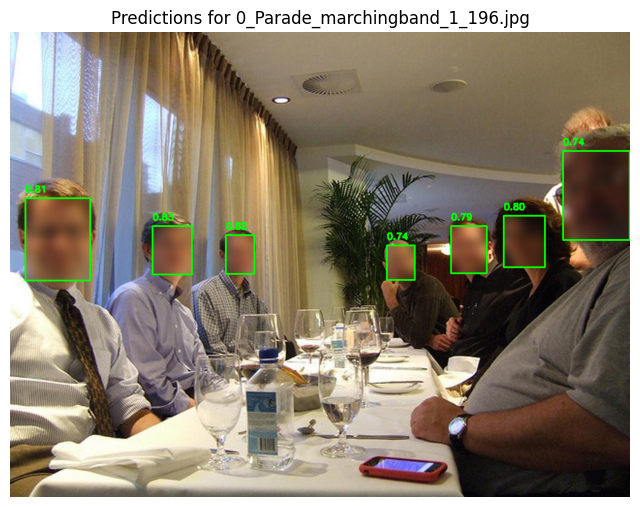

In [2]:
%matplotlib inline
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 加载模型
# model = YOLO("runs/detect/best.pt")
model = YOLO("best_model/result/512/best_512.pt")

# test_image_path = "../datasets/YOLO_format_widerface/test/images/0_Parade_marchingband_1_196.jpg"
test_image_path = "../datasets/YOLO_format_widerface/test/images/56_Voter_peoplevoting_56_342.jpg"
test_image_name = "0_Parade_marchingband_1_196.jpg"

# Read the image
img = cv2.imread(str(test_image_path))

# 使用模型进行推理
results = model.predict(source=img, save=False, imgsz=640,conf=0.3)

# calculate the fps
infer_speed_per_img = f"{results[0].speed['inference']:.2f}"
infer_speed_per_img = float(infer_speed_per_img) * 10**-3
fps = 1 / infer_speed_per_img
print(f"The FPS is : {fps:.2f}")

# 获取推理后的图像，添加检测框
# result_img = results[0].plot()  # YOLOv8 API 中可直接使用 plot() 获取带标注的图像
boxes = results[0].boxes
# Apply Gaussian blur to each detected region
for box in boxes:
    # Extract the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Ensure coordinates are within image bounds
    x1, y1 = max(x1, 0), max(y1, 0)
    x2, y2 = min(x2, img.shape[1]), min(y2, img.shape[0])

    # Extract the region of interest (ROI)
    roi = img[y1:y2, x1:x2]

    # Apply Gaussian blur to the ROI
    blurred_roi = cv2.GaussianBlur(roi, (51, 51), 0)

    # Place the blurred ROI back into the original image
    img[y1:y2, x1:x2] = blurred_roi

    # 繪製邊框
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 顯示置信度
    label = f"{box.conf[0]:.2f}"
    label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    label_y = y1 - 10 if y1 - 10 > 10 else y1 + 10
    cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 显示图像
plt.figure(figsize=(8, 8))
# plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Predictions for {test_image_name}")
plt.show()


# Calculate the average FPS


In [27]:
from ultralytics import YOLO
import cv2
from pathlib import Path
import random

# Load the YOLO model
model = YOLO("best_model/result/640/best_640.pt")
# model = YOLO("best_model/result/416/best_416.pt")
# model = YOLO("best_model/result/512/best_512.pt")

# Define the directory containing images
image_dir = Path("../datasets/YOLO_format_widerface/test/images")
# 随机
all_images = list(image_dir.glob("*.jpg"))  
random_images = random.sample(all_images, 500)

# Initialize variables for FPS calculation
total_fps = 0
image_count = 0

# Loop through all images in the directory
for img_path in random_images:
    # Read the image
    img = cv2.imread(img_path)

    # Perform inference
    results = model.predict(source=img, save=False, imgsz=192, conf=0.3)

    # Calculate FPS for this image
    infer_speed_per_img = f"{results[0].speed['inference']:.2f}"
    infer_speed_per_img = float(infer_speed_per_img) * 10**-3
    fps = 1 / infer_speed_per_img

    total_fps += fps
    image_count += 1

    # Optional: Print progress
    if image_count % 100 == 0:  # Print every 100 images
        print(f"Processed {image_count} images...")

# Calculate the average FPS
average_fps = total_fps / image_count if image_count > 0 else 0

print("=======================================================================")
print(f"Processed {image_count} images in total.")
print(f"Average FPS: {average_fps:.2f}")



0: 128x192 3 faces, 6.7ms
Speed: 0.5ms preprocess, 6.7ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 192)

0: 192x160 3 faces, 7.1ms
Speed: 0.5ms preprocess, 7.1ms inference, 0.4ms postprocess per image at shape (1, 3, 192, 160)

0: 160x192 (no detections), 7.1ms
Speed: 0.5ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 160, 192)

0: 192x128 2 faces, 6.0ms
Speed: 0.6ms preprocess, 6.0ms inference, 0.2ms postprocess per image at shape (1, 3, 192, 128)
0: 160x192 (no detections), 6.3ms
Speed: 0.7ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 160, 192)

0: 160x192 1 face, 7.4ms
Speed: 0.4ms preprocess, 7.4ms inference, 0.2ms postprocess per image at shape (1, 3, 160, 192)

0: 128x192 (no detections), 8.0ms
Speed: 0.8ms preprocess, 8.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 192)

0: 192x160 (no detections), 5.6ms
Speed: 0.6ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1,